In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import ot
import os

In [2]:
from SDEOU import SDE_OU
from SDECellChemotaxis import SDE_CellChemotaxis

In [3]:
class SDE_General1D(object):
    # parameters :
        # x : (num_cells,) points
        # h : float step size
        # mu : ((num_cells,), float) -> (num_cells,)
        # sigma : ((num_cells,), float) -> (num_cells,)
        # time : float
        # x_bounds : (2,) bounds for cell location

    def __init__(self, x, h, mu, sigma, time, x_bounds=None):
        self.x = x
        self.h = h
        self.mu = mu
        self.sigma = sigma
        self.time = time
        self.x_bounds = x_bounds

        self.num_cells = self.x.shape
    
    def take_step(self,):
        x_step_mu = self.mu(self.x, self.time)
        x_step_sigma = self.sigma(self.x, self.time)
        x_step_delta_w = np.random.normal(0, np.sqrt(self.h), size=(self.num_cells))
        x_step = x_step_mu*self.h + x_step_sigma*x_step_delta_w
        self.x = self.x + x_step

        if self.x_bounds is not None:
            self.x = np.where(self.x < self.x_bounds[0], self.x_bounds[0], self.x)
            self.x = np.where(self.x > self.x_bounds[1], self.x_bounds[1], self.x)
        
        self.time = self.time + self.h


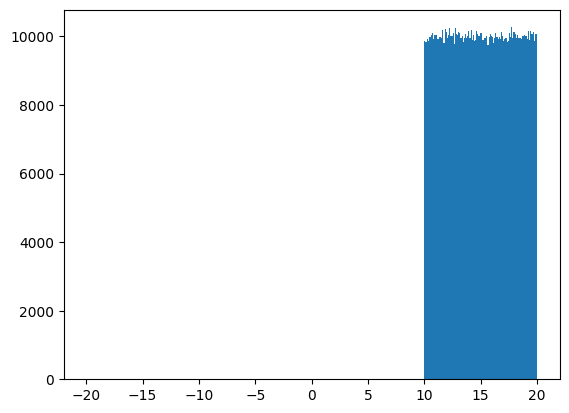

1
1017.8023269964906
0.047615556528868536
2
18880.87864885737
0.3598108896852256
3
3562.5009813638676
0.5879430063562453
4
3003.483991523908
0.5968797629312814
5
2348.646768354476
0.9109928947375141
6
2015.9140452114993
0.8498367510683493
7
1970.3402809541524
0.9672983114434477
8
1861.7501555732215
0.917425027915919
9
1883.2550086136198
0.9758459362229023
10
1821.6043970323672
0.9386711686127447
m is 10
Shape of H is (11, 10)
Shape of V is (11, 1000000)


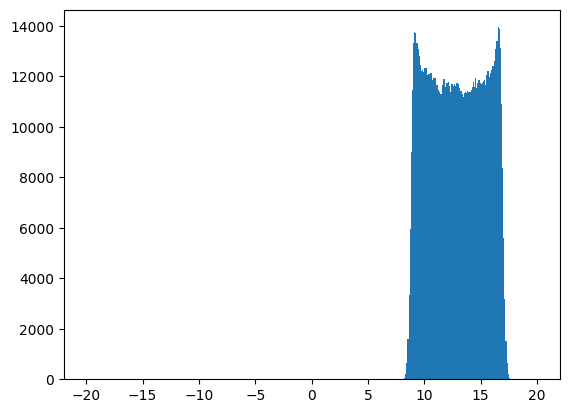

1
1016.0063969201927
0.0066027436337411285
2
37044.13017923487
1.1803373126643006
3
1754.2570663349716
0.21408772406222143
4
4874.641616860826
1.516956109334382
5
1478.310347540577
0.24485031920193126
6
4428.915144156706
1.6001841869345843
7
1491.759346513697
0.2758864591173168
8
4006.0043880017242
1.7780228855455928
9
1548.4497234196338
0.4204939065365833
10
3171.816081347799
2.186633594162627
m is 10
Shape of H is (11, 10)
Shape of V is (11, 1000000)


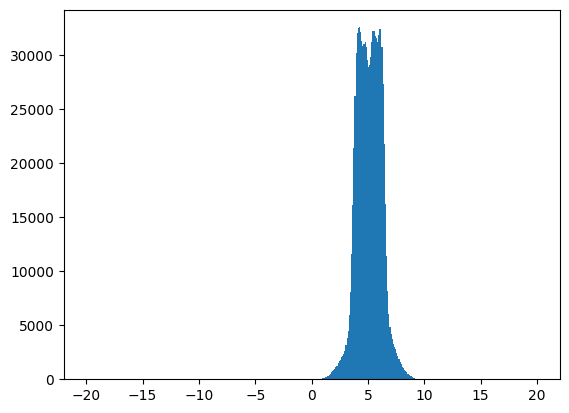

1
1010.764810993166
0.01639459567617477
2
20869.434670942625
1.3489680583158934
3
1539.414352780904
0.08178355861498458
4
6676.12718775444
1.6898156880080144
5
1504.5073210115968
0.20916219642748346
6
5112.797773928163
2.0935703098302243
7
1573.9295792171213
0.4204346340073654
8
2985.227292205706
2.4307041248828662
9
1590.4694051541069
0.5210135833206769
10
2531.8613628910334
2.4560728589419916
m is 10
Shape of H is (11, 10)
Shape of V is (11, 1000000)


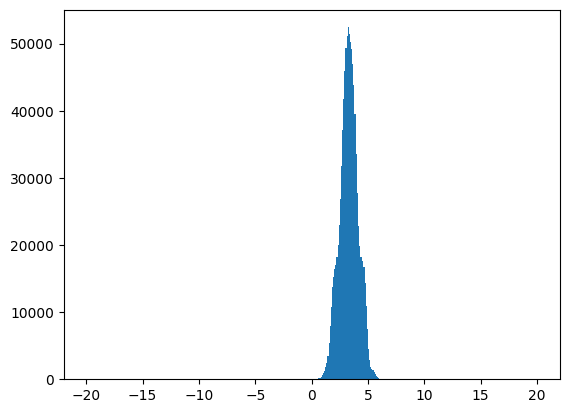

1
1006.6622821410564
0.038244374683732575
2
13893.243905511692
1.1928429643928522
3
1624.5310801256555
0.20569123901200984
4
5091.372783123718
1.378340767684607
5
1569.5213683418774
0.28673708559785693
6
4452.973959889649
1.5798815693806976
7
1628.6409060488309
0.431751343021131
8
3420.921757433487
1.856323059778294
9
1661.7217987766007
0.5311440116596207
10
2947.673560255083
1.7605956014635948
m is 10
Shape of H is (11, 10)
Shape of V is (11, 1000000)


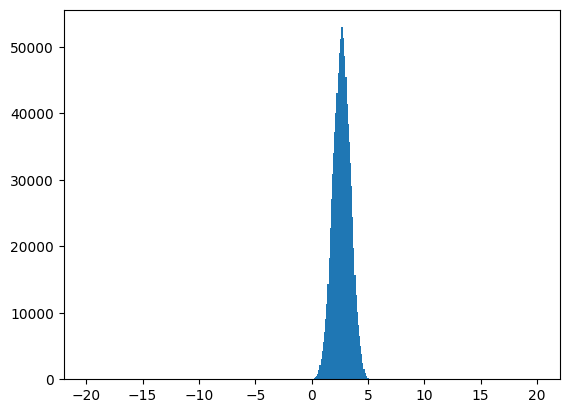

1
1002.1180787148004
0.03159172564164597
2
20062.92846319224
1.1185945397105628
3
1689.7766667105006
0.26253726456163845
4
4490.397176479545
1.4740825052792832
5
1521.2527599005412
0.3186514607924905
6
4115.445707013126
1.5677600378972338
7
1555.645861093444
0.3679836393474073
8
3826.6991288951263
1.719141903150122
9
1641.2326617326091
0.4653113259412556
10
3257.5864028035594
2.0204864576123733
m is 10
Shape of H is (11, 10)
Shape of V is (11, 1000000)


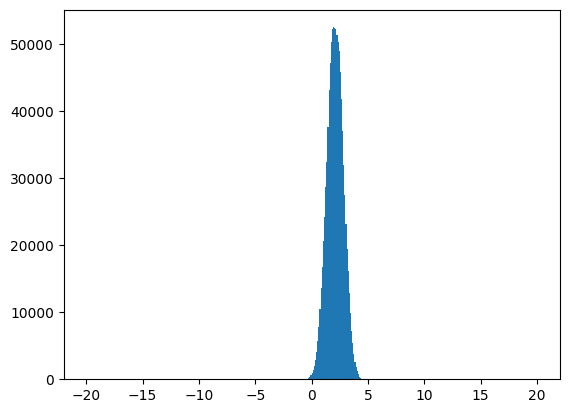

In [95]:
# SDE1D

NUM_PARTS = 1000000
H = 1/100 # 1/128

NUM_NEWTON_STEPS = 5
NUM_STEPS_FOR_ORACLE_STEP = 1 # 16
NUM_BURNIN_STEPS = 5 # 32

NUM_KRYLOV_DIMS = 10

def p0(x):
    # return np.exp(-x**2/2) + 1/3*np.exp(-(x-2)**2/2) + 1/4*np.exp(-(x-4)**2/4)
    # return np.exp(-x**2/2) + 1/2*np.exp(-(x-2)**2/2) + 1/3*np.exp(-(x-3)**2/2) + 1/4*np.exp(-(x-4)**2/2) + 1/5*np.exp(-(x-5)**2/2)
    return np.exp(-x**2/2) + np.exp(-x**2/128)
def p1(x):
    # return -x*np.exp(-x**2/2) - 1/3*(x-2)*np.exp(-(x-2)**2/2) - 1/4*(x-4)*1/2*np.exp(-(x-4)**2/4)
    # return -x*np.exp(-x**2/2) - 1/2*(x-1)*np.exp(-(x-2)**2/2) - 1/3*(x-3)*np.exp(-(x-3)**2/2) - 1/4*(x-4)*np.exp(-(x-4)**2/2) - 1/5*(x-5)*np.exp(-(x-5)**2/2)
    return 1*(-x*np.exp(-x**2/2) - x*1/64*np.exp(-x**2/128))
def mu(x,t):
    return -x
    # return (1/(x**2/2+0.3))*x-x
    # return (1/(x**2/2+0.3))*x-x + 0.1
    # return -x-0.2*x**3
    # return -x + 2*np.sin(x)
    # return p1(x)/p0(x)
def sigma(x,t):
    return 1

x_newton = np.zeros((NUM_NEWTON_STEPS+1, NUM_PARTS))
HIST_BINS = np.linspace(-20,20,401)

krylov_q = np.zeros((NUM_KRYLOV_DIMS+1,NUM_PARTS))
krylov_w = np.zeros((NUM_KRYLOV_DIMS,NUM_PARTS))
krylov_h = np.zeros((NUM_KRYLOV_DIMS+1,NUM_KRYLOV_DIMS))

x_start_init = np.random.uniform(10,20,size=NUM_PARTS)
x_start = np.sort(x_start_init)
sde1 = SDE_General1D(x_start, H, mu, sigma, 0)

x_newton[0] = x_start
plt.figure()
plt.hist(x_newton[0], bins=HIST_BINS)
plt.show()

for k in range(NUM_NEWTON_STEPS):
    for n in range(NUM_STEPS_FOR_ORACLE_STEP):
        sde1.take_step()
    x_after_one_oracle_step = np.sort(sde1.x)
    
    b = -(x_after_one_oracle_step - x_start)
    beta = np.linalg.norm(b)
    krylov_q[0] = b/beta

    for j in range(NUM_KRYLOV_DIMS):
        print(j+1)
        DELTA = 1/np.average(krylov_q[j])
        print(DELTA)
        x_start_perturbed = x_start + DELTA*krylov_q[j]
        sde1.x = x_start_perturbed
        for n in range(NUM_STEPS_FOR_ORACLE_STEP):
            sde1.take_step()
        x_after_one_oracle_step_perturbed = np.sort(sde1.x)
        krylov_w[j] = (x_after_one_oracle_step_perturbed - x_after_one_oracle_step)/DELTA-krylov_q[j]
        for i in range(j+1):
            krylov_h[i,j] = np.dot(krylov_w[j],krylov_q[j])
            krylov_w[j] -= krylov_h[i,j]*krylov_q[i]
        krylov_h[j+1,j] = np.linalg.norm(krylov_w[j])
        print(krylov_h[j+1,j])
        if np.abs(krylov_h[j+1,j])<1e-10:
            m = j+1
            print("BREAKING BECAUSE np.abs(krylov_h[j+1,j]) = " + str(np.abs(krylov_h[j+1,j])))
            krylov_q = krylov_q[0:m]
            krylov_w = krylov_w[0:m]
            krylov_h = krylov_h[0:m+1,0:m]
            break
        krylov_q[j+1] = krylov_w[j]/krylov_h[j+1,j]
    m = j+1
    print("m is " + str(m))
    print("Shape of H is " + str(np.shape(krylov_h)))
    print("Shape of V is " + str(np.shape(krylov_q)))
    y_m = np.linalg.lstsq(krylov_h,beta*np.eye(1,m+1,0).reshape(m+1,), rcond=None)[0]
    
    x_update = krylov_q[0:m].T@y_m
    x_next = x_start + x_update
    
    sde1.x = x_next
    for n in range(NUM_BURNIN_STEPS):
        sde1.take_step()
    
    x_start = np.sort(sde1.x)
    x_newton[k+1] = x_start

    plt.figure()
    plt.hist(x_newton[k+1], bins=HIST_BINS)
    plt.show()

